In [ ]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
rate, data = wavfile.read('./output.wav')
len(data), rate

(16000, 8000)

In [ ]:
data

array([[ 0.0000000e+00,  0.0000000e+00],
       [-3.0517578e-05,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       ...,
       [-1.8218994e-02, -1.8249512e-02],
       [-2.5573730e-02, -2.5604248e-02],
       [-2.0477295e-02, -2.0477295e-02]], dtype=float32)

In [ ]:
data=data[:,0]

In [ ]:
data

array([ 0.0000000e+00, -3.0517578e-05,  0.0000000e+00, ...,
       -1.8218994e-02, -2.5573730e-02, -2.0477295e-02], dtype=float32)

In [ ]:
lx=len(data)
def sign(a):
    if a>=0:
        return 1
    else:
        return -1

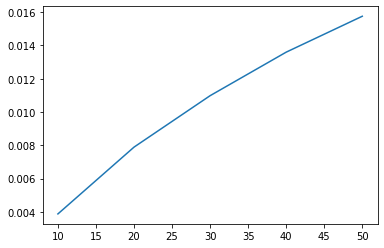

In [ ]:
#---------------------------------------------------(a)------------------------------------------------------------
larr=[10,20,30,40,50]
sqnr=[]
for l in larr:
    x=[];
    #Linear Interpolation with factor=l
    x.append(data[0])
    for i in range(1,lx):
        base=data[i-1]
        tmp=(data[i]-data[i-1])/l
        for j in range(1,l):
            x.append(base+j*tmp)
        x.append(data[i])

    #delta modulation
    d=0.000001*8
    e=[]
    eq=[]
    xq=[]
    for i in range(0,len(x)):
        if i==0:
            e.append(x[i])
            eq.append(d*sign(e[i]))
            xq.append(eq[i])
        else:
            e.append(x[i]-xq[i-1])
            eq.append(d*sign(e[i]))
            xq.append(eq[i]+xq[i-1])
    #SQNR
    f=[]
    qn=0
    for i in range(0,len(x)):
        f.append(x[i]-xq[i])
        qn+=f[i]*f[i]
    s=0
    for i in range(0,len(x)):
        s+=xq[i]*xq[i]
    sqnr.append(s/qn)
plt.plot(larr,sqnr)

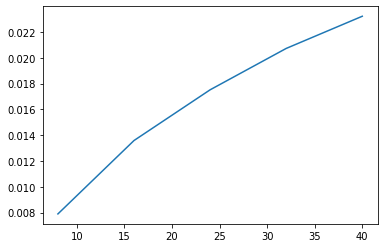

In [ ]:
#------------------------------------------------------(b)-----------------------------------------------------------
larr=[8,16,24,32,40]
sqnr=[]
x=[];
l=20
#Linear Interpolation with factor=l
x.append(data[0])
for i in range(1,lx):
    base=data[i-1]
    tmp=(data[i]-data[i-1])/l
    for j in range(1,l):
        x.append(base+j*tmp)
    x.append(data[i])
for k in larr:
    #delta modulation
    d=0.000001*k
    e=[]
    eq=[]
    xq=[]
    for i in range(0,len(x)):
        if i==0:
            e.append(x[i])
            eq.append(d*sign(e[i]))
            xq.append(eq[i])
        else:
            e.append(x[i]-xq[i-1])
            eq.append(d*sign(e[i]))
            xq.append(eq[i]+xq[i-1])
    #SQNR
    f=[]
    qn=0
    for i in range(0,len(x)):
        f.append(x[i]-xq[i])
        qn+=f[i]*f[i]
    s=0
    for i in range(0,len(x)):
        s+=xq[i]*xq[i]
    sqnr.append(s/qn)
plt.plot(larr,sqnr)